In [ ]:
# %%capture
# !pip install -U corus==0.10.0 tiktoken==0.10.0 youtokentome==1.0.6 sentence_transformers==5.0.0 numpy==2.0.2 matplotlib==3.10.0 torch==2.6.0+cu124 transformers==4.55.0 datasets==4.0.0

In [ ]:
%%capture
!wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

In [ ]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='–ù–∞–∑–≤–∞–Ω—ã —Ä–µ–≥–∏–æ–Ω—ã –†–æ—Å—Å–∏–∏ —Å\xa0—Å–∞–º–æ–π –≤—ã—Å–æ–∫–æ–π —Å–º–µ—Ä—Ç–Ω–æ—Å—Ç—å—é –æ—Ç\xa0—Ä–∞–∫–∞',
    text='–í–∏—Ü–µ-–ø—Ä–µ–º—å–µ—Ä –ø–æ —Å–æ—Ü–∏–∞–ª—å–Ω—ã–º –≤–æ–ø—Ä–æ—Å–∞–º –¢–∞—Ç—å—è–Ω–∞ –ì–æ–ª–∏–∫–æ–≤–∞ —Ä–∞—Å—Å–∫–∞–∑–∞–ª–∞, –≤ –∫–∞–∫–∏—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö –†–æ—Å—Å–∏–∏ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–∞ –Ω–∞–∏–±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∞—è —Å–º–µ—Ä—Ç–Ω–æ—Å—Ç—å –æ—Ç —Ä–∞–∫–∞, —Å–æ–æ–±—â–∞–µ—Ç –†–ò–ê –ù–æ–≤–æ—Å—Ç–∏. –ü–æ —Å–ª–æ–≤–∞–º –ì–æ–ª–∏–∫–æ–≤–æ–π, —á–∞—â–µ –≤—Å–µ–≥–æ –æ–Ω–∫–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å—Ç–∞–Ω–æ–≤–∏–ª–∏—Å—å –ø—Ä–∏—á–∏–Ω–æ–π —Å–º–µ—Ä—Ç–∏ –≤ –ü—Å–∫–æ–≤—Å–∫–æ–π, –¢–≤–µ—Ä—Å–∫–æ–π, –¢—É–ª—å—Å–∫–æ–π –∏ –û—Ä–ª–æ–≤—Å–∫–æ–π –æ–±–ª–∞—Å—Ç—è—Ö, –∞ —Ç–∞–∫–∂–µ –≤ –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª–µ. –í–∏—Ü–µ-–ø—Ä–µ–º—å–µ—Ä –Ω–∞–ø–æ–º–Ω–∏–ª–∞, —á—Ç–æ –≥–ª–∞–≤–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã —Å–º–µ—Ä—Ç–Ω–æ—Å—Ç–∏ –≤ –†–æ—Å—Å–∏–∏ ‚Äî —Ä–∞–∫ –∏ –±–æ–ª–µ–∑–Ω–∏ —Å–∏—Å—Ç–µ–º—ã –∫—Ä–æ–≤–æ–æ–±—Ä–∞—â–µ–Ω–∏—è. –í 

In [ ]:
dataset = [next(records).text for i in range(1000)]
dataset[0]

'–ê–≤—Å—Ç—Ä–∏–π—Å–∫–∏–µ –ø—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ä–≥–∞–Ω—ã –Ω–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏–ª–∏ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤ –Ω–∞—Ä—É—à–µ–Ω–∏—è —Ä–æ—Å—Å–∏–π—Å–∫–∏–º–∏ –±–∏–∞—Ç–ª–æ–Ω–∏—Å—Ç–∞–º–∏ –∞–Ω—Ç–∏–¥–æ–ø–∏–Ω–≥–æ–≤—ã—Ö –ø—Ä–∞–≤–∏–ª. –û–± —ç—Ç–æ–º —Å–æ–æ–±—â–∏–ª –ø–æ—Å–æ–ª –†–æ—Å—Å–∏–∏ –≤ –í–µ–Ω–µ –î–º–∏—Ç—Ä–∏–π –õ—é–±–∏–Ω—Å–∫–∏–π –ø–æ –∏—Ç–æ–≥–∞–º –≤—Å—Ç—Ä–µ—á–∏ —É–ø–æ–ª–Ω–æ–º–æ—á–µ–Ω–Ω–æ–≥–æ –∞–¥–≤–æ–∫–∞—Ç–∞ –¥–∏–ø–º–∏—Å—Å–∏–∏ —Å –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª—è–º–∏ –ø—Ä–æ–∫—É—Ä–∞—Ç—É—Ä—ã —Å—Ç—Ä–∞–Ω—ã, –ø–µ—Ä–µ–¥–∞–µ—Ç –¢–ê–°–°. ¬´–î–µ–π—Å—Ç–≤—É–µ—Ç –ø—Ä–µ–∑—É–º–ø—Ü–∏—è –Ω–µ–≤–∏–Ω–æ–≤–Ω–æ—Å—Ç–∏. –ö–∞–∫–∏—Ö-–ª–∏–±–æ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–π —Å–≤–æ–±–æ–¥—ã –ø–µ—Ä–µ–¥–≤–∏–∂–µ–Ω–∏—è –¥–ª—è –∫–æ–º–∞–Ω–¥—ã –Ω–µ—Ç¬ª, ‚Äî –¥–æ–±–∞–≤–∏–ª–∏ –≤ –ø–æ—Å–æ–ª—å—Å—Ç–≤–µ. –ú–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã–π —Å–æ—é–∑ –±–∏–∞—Ç–ª–æ–Ω–∏—Å—Ç–æ–≤ (IBU) —Ç–∞–∫–∂–µ –Ω–µ –±—É–¥–µ—Ç –ø—Ä–∏–º–µ–Ω—è—Ç—å —Å–∞–Ω–∫—Ü–∏–∏ –∫ —Ä–æ—Å—Å–∏–π—Å–∫–∏–º –±–∏–∞—Ç–ª–æ–Ω–∏—Å—Ç–∞–º. –í—Å–µ –æ–Ω–∏ –ø—Ä–æ–¥–æ–ª–∂–∞—Ç –≤—ã—Å—Ç—É–ø–ª–µ–Ω–∏–µ

## –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è

–¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è ‚Äî –ø—Ä–æ—Ü–µ—Å—Å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤—Ö–æ–¥–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ –≤ —Å–ø–∏—Å–æ–∫ —Ç–æ–∫–µ–Ω–æ–≤. –û–±—ã—á–Ω–æ –¥–∞–ª–µ–µ –∫–∞–∂–¥—ã–π —Ç–æ–∫–µ–Ω –≤–µ–∫—Ç–æ—Ä–∏–∑—É–µ—Ç—Å—è, –∏ –≤–µ—Å—å —ç—Ç–æ—Ç –º–∞—Å—Å–∏–≤ –≤–µ–∫—Ç–æ—Ä–æ–≤ –ø–æ–¥–∞—ë—Ç—Å—è –º–æ–¥–µ–ª–∏ –Ω–∞ –≤—Ö–æ–¥, —Å —á–µ–º –æ–Ω–∞ –Ω–∞—á–∏–Ω–∞–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å.

–í –º–æ–¥–µ–ª—è—Ö –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã Transformer —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä—ã –æ–±—É—á–∞–µ–º—ã. –û–±—É—á–µ–Ω–∏–µ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–æ–≤ –Ω–µ —Å—Ö–æ–∂–µ —Å —Ç–µ–º, –∫–∞–∫ –æ–±—É—á–∞—é—Ç—Å—è ML-–º–æ–¥–µ–ª–∏, –Ω–∞–æ–±–æ—Ä–æ—Ç, —ç—Ç–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –ø—Ä–æ—Ü–µ—Å—Å, –∫–æ—Ç–æ—Ä—ã–π –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç, –∫–∞–∫–∏–µ —Å–æ—á–µ—Ç–∞–Ω–∏—è —Å–∏–º–≤–æ–ª–æ–≤ (–ø–æ–¥—Å–ª–æ–≤, —Å–ª–æ–≤) –ª—É—á—à–µ –≤—Å–µ–≥–æ –≤—ã–±—Ä–∞—Ç—å –¥–ª—è –∫–æ—Ä–ø—É—Å–∞ —Ç–µ–∫—Å—Ç–∞, —Å –∫–æ—Ç–æ—Ä—ã–º –º—ã —Ä–∞–±–æ—Ç–∞–µ–º.

### BPE

BPE –∞–∫—Ç–∏–≤–Ω–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ GPT-like –º–æ–¥–µ–ª—è—Ö, –æ–±—É—á–∞–µ—Ç—Å—è —Å–ª–∏—è–Ω–∏–µ–º —Å–∏–º–≤–æ–ª–æ–≤ –∏–∑ –æ—Å–Ω–æ–≤–Ω–æ–≥–æ –∫–æ—Ä–ø—É—Å–∞, –≤—ã–±–∏—Ä–∞—è –ø–∞—Ä—ã –ø–æ –Ω–∞–∏–±–æ–ª—å—à–µ–π —á–∞—Å—Ç–æ—Ç–µ –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏

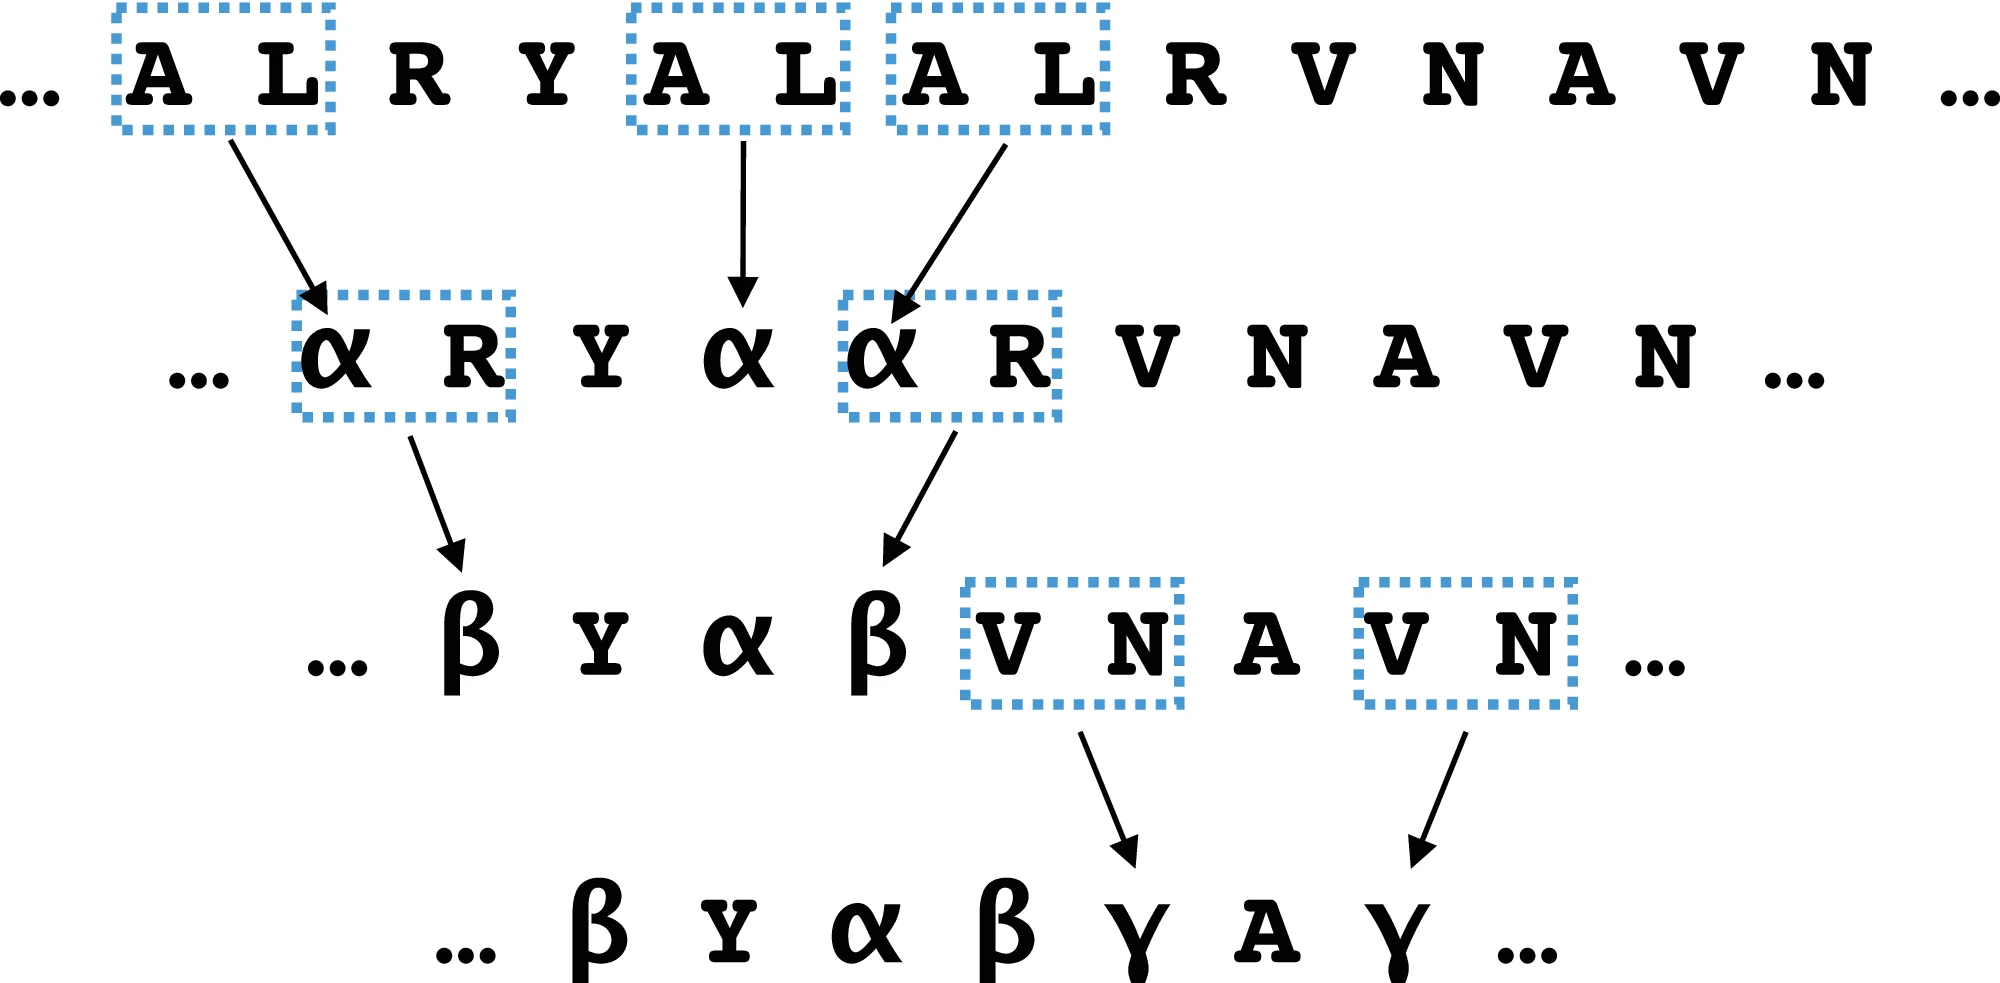

#### –ù—É–∂–µ–Ω –ª–∏ –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥?

GPT-2 [encoder.py](https://github.com/openai/gpt-2/blob/master/src/encoder.py) - GPT-2 BPE –¥–ª—è –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞

In [ ]:
import regex as re

gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "Hi, how are you? I'm fine. qwe123   test"))

['Hi', ',', ' how', ' are', ' you', '?', ' I', "'m", ' fine', '.', ' qwe', '123', '  ', ' test']


#### Tiktoken

[tiktoken](https://github.com/openai/tiktoken) - `is a fast BPE tokeniser for use with OpenAI's models`


–û—Å–Ω–æ–≤–Ω–∞—è –∑–∞–¥–∞—á–∞ tiktoken ‚Äî —Ä–∞–∑–±–∏–≤–∞—Ç—å —Ç–µ–∫—Å—Ç –Ω–∞ —Ç–æ–∫–µ–Ω—ã (—Ñ—Ä–∞–≥–º–µ–Ω—Ç—ã —Ç–µ–∫—Å—Ç–∞), –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è —è–∑—ã–∫–æ–≤—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏ –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞.

–ê–ª–≥–æ—Ä–∏—Ç–º BPE –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –æ–±—Ä–∞—Ç–∏–º–æ—Å—Ç—å –æ–ø–µ—Ä–∞—Ü–∏–∏ (–º–æ–∂–Ω–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ç–µ–∫—Å—Ç –ø–æ —Ç–æ–∫–µ–Ω–∞–º) –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Å–ª–æ–≤ –∏ –ø–æ–¥—Å–ª–æ–≤, –≤ —Ç–æ–º —á–∏—Å–ª–µ —Ç–µ—Ö, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ –±—ã–ª–æ –≤ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ.

tiktoken –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç —Ä–∞–∑–Ω—ã–µ —Å—Ö–µ–º—ã –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è ‚Äî –¥–ª—è –º–æ–¥–µ–ª–µ–π GPT-4, GPT-3.5, Codex, –∏ –¥—Ä—É–≥–∏—Ö.

–° –ø–æ–º–æ—â—å—é tiktoken –º–æ–∂–Ω–æ:

- –û–ø—Ä–µ–¥–µ–ª—è—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–∫–µ–Ω–æ–≤ –≤ —Ç–µ–∫—Å—Ç–µ

- –ö–æ–¥–∏—Ä–æ–≤–∞—Ç—å –∏ –¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å —Ç–µ–∫—Å—Ç


##### Encode/decode

In [ ]:
import tiktoken

enc = tiktoken.get_encoding("gpt2")
tokens = enc.encode("    hello world!!!")
print(tokens)

[220, 220, 220, 23748, 995, 10185]


In [ ]:
len(tokens)

6

In [ ]:
enc.decode(tokens)

'    hello world!!!'

##### educational –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏—è

In [ ]:
from tiktoken._educational import *

# Visualise how the GPT-4 encoder encodes text
enc = SimpleBytePairEncoding.from_tiktoken("cl100k_base")

–í—ã—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –æ–±—Ä–µ–∑–∞–Ω—ã –¥–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Å—Ç—Ä–æ–∫ (5000).
The current most common pair is b' ' + b'en'
So we made b' en' our 324th token
Now the first fifty words in our training data look like:
"""This is an educational implementation of the byte pair encoding algorithm."""

from __future__ import annotations

import collections

import regex

import tiktoken


class SimpleBytePairEncoding:
    def __init__(self, *, pat_str:


The current most common pair is b'u' + b'al'
So we made b'ual' our 325th token
Now the first fifty words in our training data look like:
"""This is an educational implementation of the byte pair encoding algorithm."""

from __future__ import annotations

import collections

import regex

import tiktoken


class SimpleBytePairEncoding:
    def __init__(self, *, pat_str:


The current most common pair is b'\n        ' + b'    '
So we made b'\n            ' our 326th token
Now the first fifty words in ou

In [ ]:
enc.encode("hello world aaaaaaaaaaaa")

hello
hello
hello
hello
hello

 world
 world
 world
 world
 world
 world

 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa



[15339, 1917, 264, 70540, 33746]

#### YouTokenToMe

[YouTokenToMe](https://github.com/vkcom/YouTokenToMe) –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π  —Ç–µ–∫—Å—Ç–æ–≤—ã–π —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä, –æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –Ω–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –≤—ã—á–∏—Å–ª–µ–Ω–∏–π. –í –Ω–∞—Å—Ç–æ—è—â–µ–µ –≤—Ä–µ–º—è –æ–Ω —Ä–µ–∞–ª–∏–∑—É–µ—Ç Byte Pair Encoding  (BPE). –≠—Ç–∞ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è –Ω–∞–º–Ω–æ–≥–æ –±—ã—Å—Ç—Ä–µ–µ –≤ –æ–±—É—á–µ–Ω–∏–∏ –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏, —á–µ–º Hugging Face, fastBPE –∏ SentencePiece. –í –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Ç–µ—Å—Ç–æ–≤—ã—Ö —Å–ª—É—á–∞—è—Ö –æ–Ω–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ 90 —Ä–∞–∑ –±—ã—Å—Ç—Ä–µ–µ.

In [ ]:
import youtokentome as yttm

In [ ]:
with open('dataset.txt', "w") as f:
    for i in range(1000):
        print(dataset[i], file=f)

In [ ]:
%%time
model_name = 'bpe_vk.model'
yttm.BPE.train(data='dataset.txt', vocab_size=5000, model=model_name)

CPU times: user 394 ms, sys: 104 ms, total: 498 ms
Wall time: 321 ms


In [ ]:
bpe = yttm.BPE(model=model_name)
print(bpe.encode([dataset[0]], output_type=yttm.OutputType.ID))

[[1985, 4588, 587, 2396, 355, 769, 212, 236, 839, 198, 3682, 300, 323, 1080, 827, 476, 2269, 2998, 200, 245, 243, 4738, 4862, 797, 1692, 409, 375, 1282, 202, 480, 14, 440, 186, 244, 559, 1861, 497, 33, 2754, 472, 202, 3128, 1364, 266, 227, 899, 2879, 477, 312, 2881, 216, 604, 18, 243, 1633, 187, 839, 2941, 3434, 1553, 2909, 1240, 2582, 1320, 265, 1827, 275, 546, 17, 18, 524, 236, 231, 341, 2281, 669, 900, 3327, 4241, 736, 3715, 1651, 231, 808, 443, 3946, 1694, 314, 278, 1006, 198, 186, 202, 480, 210, 699, 29, 4185, 360, 238, 2280, 4357, 189, 357, 108, 106, 128, 66, 499, 236, 639, 261, 2622, 228, 4389, 264, 3096, 2998, 200, 245, 577, 1319, 814, 1977, 10, 2378, 751, 209, 1448, 22, 389, 4582, 3108, 524, 209, 24, 287, 4817, 186, 192, 300, 3240, 440, 186, 4870, 3729, 957, 911, 956, 2223, 4357, 1515, 3826, 25, 658, 4892, 3468, 696, 186, 407, 679, 191, 4207, 187, 415, 1689, 1307, 4150, 1248, 3525, 2807, 200, 417, 951, 193, 299, 3308, 376, 198, 2647, 499, 1525, 4928, 186, 1296, 480, 1528, 2737

In [ ]:
print(bpe.encode([dataset[0]], output_type=yttm.OutputType.SUBWORD))

[['‚ñÅ–ê–≤', '—Å—Ç—Ä–∏–π', '—Å–∫–∏–µ', '‚ñÅ–ø—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–∏—Ç–µ–ª—å', '–Ω—ã–µ', '‚ñÅ–æ—Ä–≥–∞', '–Ω—ã', '‚ñÅ–Ω–µ', '‚ñÅ–ø—Ä–µ–¥—Å—Ç–∞–≤–∏', '–ª–∏', '‚ñÅ–¥–æ–∫–∞–∑–∞', '—Ç–µ–ª—å', '—Å—Ç–≤', '‚ñÅ–Ω–∞—Ä—É', '—à–µ–Ω–∏—è', '‚ñÅ—Ä–æ—Å—Å–∏–π', '—Å–∫–∏–º–∏', '‚ñÅ–±–∏–∞—Ç–ª–æ', '–Ω–∏', '—Å—Ç–∞', '–º–∏', '‚ñÅ–∞–Ω—Ç–∏–¥–æ', '–ø–∏–Ω–≥–æ–≤—ã—Ö', '‚ñÅ–ø—Ä–∞–≤–∏', '–ª.', '‚ñÅ–û–±', '‚ñÅ—ç—Ç–æ–º', '‚ñÅ—Å–æ–æ–±—â–∏–ª', '‚ñÅ–ø–æ', '—Å–æ', '–ª', '‚ñÅ–†–æ—Å—Å–∏–∏', '‚ñÅ–≤', '‚ñÅ–í', '–µ–Ω–µ', '‚ñÅ–î–º–∏—Ç—Ä–∏–π', '‚ñÅ–õ', '—é', '–±–∏–Ω', '—Å–∫–∏–π', '‚ñÅ–ø–æ', '‚ñÅ–∏—Ç–æ–≥–∞–º', '‚ñÅ–≤—Å—Ç—Ä–µ', '—á–∏', '‚ñÅ—É', '–ø–æ–ª', '–Ω–æ–º–æ', '—á–µ–Ω', '–Ω–æ–≥–æ', '‚ñÅ–∞–¥–≤–æ–∫–∞', '—Ç–∞', '‚ñÅ–¥–∏', '–ø', '–º–∏', '—Å—Å–∏–∏', '‚ñÅ—Å', '‚ñÅ–ø—Ä–µ–¥—Å—Ç–∞–≤–∏', '—Ç–µ–ª—è–º–∏', '‚ñÅ–ø—Ä–æ–∫—É—Ä–∞', '—Ç—É—Ä—ã', '‚ñÅ—Å—Ç—Ä–∞–Ω—ã,', '‚ñÅ–ø–µ—Ä–µ–¥–∞–µ—Ç', '‚ñÅ–¢–ê–°–°.', '‚ñÅ¬´–î', '–µ–π', '—Å—Ç–≤—É–µ—Ç', '‚ñÅ–ø—Ä–µ', '–∑—É', '–º', '–ø', '—Ü–∏—è', '‚ñÅ–Ω–µ', '–≤–∏', '–Ω–æ–≤', '–Ω–æ—Å—Ç–∏.', '‚ñÅ–ö–∞', '–∫–∏—Ö', '-

#### transformers AutoTokenizer

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")

text = "Hello, how are you?"
encoded_input = tokenizer(text)
encoded_input

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:86: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'input_ids': [15496, 11, 703, 389, 345, 30], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

text = "Hello, how are you?"
print(tokenizer(text))
print(tokenizer(text, padding="max_length"))
print(tokenizer(text, text, add_special_tokens=True))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 7592, 1010, 2129, 2024, 2017, 1029, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}
{'input_ids': [101, 7592, 1010, 2129, 2024, 2017, 1029, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### –í–∞–∂–Ω–æ—Å—Ç—å —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ –∏ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã–µ –ø—Ä–æ–±–ª–µ–º—ã

- –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –Ω–∞–ø—Ä—è–º—É—é –≤–ª–∏—è–µ—Ç –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –ª—é–±–æ–π –º–æ–¥–µ–ª–∏, –∞ —Ç–∞–∫–∂–µ –Ω–∞ –¥–ª–∏–Ω—É –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã—á–∏—Å–ª–µ–Ω–∏–π
- –ü—Ä–∞–≤–∏–ª—å–Ω–æ —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ç–∞–∫–∂–µ —Å–∏–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –∏–∑-–∑–∞ –ø–æ—è–≤–ª–µ–Ω–∏—è —Å–∏–º–≤–æ–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã—Ö –º–æ–¥–µ–ª—å –Ω–µ –≤–∏–¥–µ–ª–∞ –∏–ª–∏ –∏–∑-–∑–∞ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–µ–π –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —è–∑—ã–∫–æ–≤, –≥–¥–µ –Ω–µ—Ç, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–æ–±–µ–ª–æ–≤

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
print(model.tokenizer.vocab_size)

tokenized_data = model.tokenize(["tokenizer tokenizes text into tokens"])
tokens = model.tokenizer.convert_ids_to_tokens(tokenized_data["input_ids"][0])
print(tokens)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

30522
['[CLS]', 'token', '##izer', 'token', '##izes', 'text', 'into', 'token', '##s', '[SEP]']


#### –ù–µ–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω—ã–µ —Ä–∞–∑–±–∏–µ–Ω–∏—è

In [ ]:
minilm_tokenizer = model.tokenizer._tokenizer
print(minilm_tokenizer.encode("unsophisticated sophisticated").tokens)

['[CLS]', 'un', '##sop', '##his', '##tica', '##ted', 'sophisticated', '[SEP]']


#### Emoji –∏ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–µ —Ç–æ–∫–µ–Ω—ã

In [ ]:
# all-MiniLM-L6-v2
print(minilm_tokenizer.encode("You can break it üòû").tokens)

# tiktoken/OpenAI
enc = tiktoken.encoding_for_model("gpt-4o")
token_data = enc.encode("You can break it üòû")
tokens = [enc.decode_single_token_bytes(number) for number in token_data]
print(tokens)

['[CLS]', 'you', 'can', 'break', 'it', '[UNK]', '[SEP]']
[b'You', b' can', b' break', b' it', b' \xf0\x9f\x98', b'\x9e']


#### –Ø–∑—ã–∫–æ–≤–∞—è –Ω–µ—Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–æ—Å—Ç—å

[tiktokenizer demo](https://tiktokenizer.vercel.app/)

In [ ]:
token_data = enc.encode("–∫–æ—Ç –µ–ª –∫–æ—Ç–ª–µ—Ç—É")
[enc.decode([token]) for token in token_data]

['–∫–æ—Ç', ' –µ–ª', ' –∫–æ—Ç', '–ª–µ—Ç', '—É']

#### –û–ø–µ—á–∞—Ç–∫–∏

In [ ]:
token_data = enc.encode("I hve received wrong pckage")
[enc.decode([token]) for token in token_data]

['I', ' h', 've', ' received', ' wrong', ' p', 'ck', 'age']

## –°—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

### Greedy, top-k, top-n, temperature

–ü—Ä–æ—Ü–µ—Å—Å –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω—ã–π (=–∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π) - –∏—Ç–µ—Ä–∞—Ç–∏–≤–Ω–æ —Å—ç–º–ø–ª–∏—Ä—É–µ–º —Å–ª–µ–¥—É—é—â–∏–π —Ç–æ–∫–µ–Ω:

* $w_{next} \sim P(w_{next} | X)$
* $X = concat(X, w_{next})$

–¢–∞–∫–∂–µ –º–æ–∂–Ω–æ –±—Ä–∞—Ç—å —Å–∞–º—ã–π –≤–µ—Ä–æ—è—Ç–Ω—ã–π —Ç–æ–∫–µ–Ω —Å—Ä–µ–¥–∏ top-k —Ç–æ–∫–µ–Ω–æ–≤:

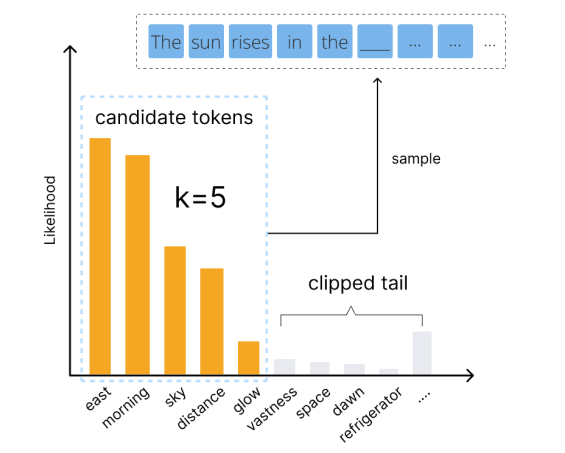

–ò–ª–∏ —Å—ç–º–ª–∏—Ä–æ–≤–∞—Ç—å —Å —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–æ–π:

$$w_{next} \sim {P(w_{next} | X) ^ {1 / \tau} \over \sum_{\hat w} P(\hat w | X) ^ {1 / \tau}}$$

–ì–¥–µ $\tau > 0$ - —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞. –ï—Å–ª–∏ $\tau << 1$, –±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—ã–µ —Ç–æ–∫–µ–Ω—ã –±—É–¥—É—Ç —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞—Ç—å—Å—è —Å –±–æ–ª—å—à–µ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é, –∞ –º–µ–Ω–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—ã–µ - —Å –º–µ–Ω—å—à–µ–π.

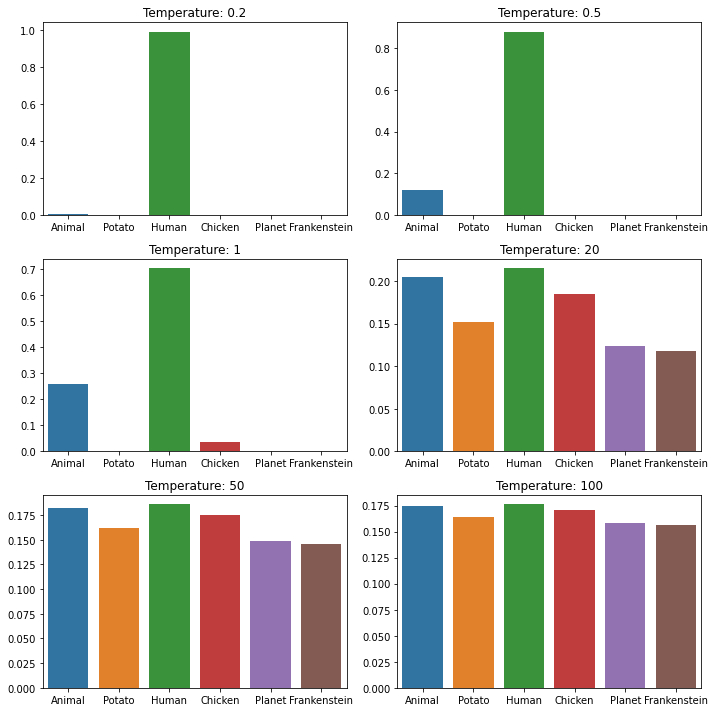

... –∏–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Nucleus Sampling - —è–¥–µ—Ä–Ω–æ–µ —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–µ - –ø–æ—Ö–æ–∂–∞—è –∏–¥–µ—è –Ω–∞ —Ç–æ–ø-k —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–µ, –Ω–æ $k$ —Ç–µ–ø–µ—Ä—å –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–∏. –í —è–¥–µ—Ä–Ω–æ–º —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–∏ –º—ã —Å—ç–º–ø–ª–∏—Ä—É–µ–º –∏–∑ top-__N%__ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

–ù–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—è—Ö —Ç–æ–∫–µ–Ω–æ–≤ $p=[0.1, 0.35, 0.05, 0.2, 0.3]$ –∏ N=0.89, —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Ç–æ–∫–µ–Ω—ã –≤—ã–≥–ª—è–¥—è—Ç –∫–∞–∫:
1. –Ω–∞–∏–±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—ã–π —Ç–æ–∫–µ–Ω $w_2$, —Ç–∞–∫ –∫–∞–∫ $p(w_2) < N$
2. –≤—Ç–æ—Ä–æ–π –Ω–∞–∏–±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—ã–π —Ç–æ–∫–µ–Ω $w_5$, $p(w_2) + p(w_5) = 0.65 < N$
3. —Ç—Ä–µ—Ç–∏–π –Ω–∞–∏–±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—ã–π —Ç–æ–∫–µ–Ω $w_4$ because $p(w_2) + p(w_5) + p(w_4) = 0.85 < N$

–ò –Ω–∞ —ç—Ç–æ–º –≤—Å–µ, —Ç–∞–∫ –∫–∞–∫ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –ª—é–±–æ–≥–æ —Å–ª–µ–¥—É—é—â–µ–≥–æ —Ç–æ–∫–µ–Ω–∞ –ø–µ—Ä–µ–ø–æ–ª–Ω–∏—Ç –≤–æ–∑–º–æ–∂–Ω–æ–µ –ø—Ä–µ–¥–µ–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (N): $p(w_2) + p(w_5) + p(w_4) + p(w_1) = 0.95 > N$.

–ü–æ—Å–ª–µ –≤—ã–±–æ—Ä–∞ —Ç–æ–∫–µ–Ω–æ–≤ —è–¥–µ—Ä–Ω—ã–º —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–µ–º, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞—Ç—å –∏—Ö –∏ —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–π —Ç–æ–∫–µ–Ω


In [ ]:
import numpy as np
from typing import List, Optional

import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [ ]:
class TemperatureSampler:
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model.to(self.device)

    def sample_with_temperature(
        self,
        logits: torch.Tensor,
        temperature: float = 1.0,
        top_k: Optional[int] = None,
        top_p: Optional[float] = None
    ) -> int:
        # –ü—Ä–∏–º–µ–Ω—è–µ–º —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—É
        if temperature != 1.0:
            logits = logits / temperature

        # Top-k —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è
        if top_k is not None and top_k > 0:
            indices_to_remove = logits < torch.topk(logits, top_k)[0][..., -1, None]
            logits[indices_to_remove] = -float('Inf')

        # Top-p —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è
        if top_p is not None and top_p < 1.0:
            sorted_logits, sorted_indices = torch.sort(logits, descending=True)
            cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)

            sorted_indices_to_remove = cumulative_probs > top_p
            sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
            sorted_indices_to_remove[..., 0] = 0

            indices_to_remove = sorted_indices_to_remove.scatter(
                dim=-1, index=sorted_indices, src=sorted_indices_to_remove
            )
            logits[indices_to_remove] = -float('Inf')

        probs = F.softmax(logits, dim=-1)
        next_token = torch.multinomial(probs, num_samples=1)

        return next_token.item()

    def generate(
        self,
        prompt: str,
        max_length: int = 50,
        temperature: float = 1.0,
        top_k: Optional[int] = 50,
        top_p: Optional[float] = 0.9,
        num_return_sequences: int = 1
    ) -> List[str]:

        self.model.eval()
        results = []

        input_ids = self.tokenizer.encode(prompt, return_tensors='pt').to(self.device)

        for _ in range(num_return_sequences):
            generated = input_ids.clone()

            with torch.no_grad():
                for _ in range(max_length):
                    outputs = self.model(generated)
                    logits = outputs.logits[0, -1, :]

                    # –°—ç–º–ø–ª–∏—Ä—É–µ–º —Å–ª–µ–¥—É—é—â–∏–π —Ç–æ–∫–µ–Ω
                    next_token_id = self.sample_with_temperature(
                        logits, temperature, top_k, top_p,
                    )

                    # –î–æ–±–∞–≤–ª—è–µ–º —Ç–æ–∫–µ–Ω –∫ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
                    next_token = torch.tensor([[next_token_id]]).to(self.device)
                    generated = torch.cat([generated, next_token], dim=1)

                    # –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞ EOS —Ç–æ–∫–µ–Ω
                    if next_token_id == self.tokenizer.eos_token_id:
                        break

            # –î–µ–∫–æ–¥–∏—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
            generated_text = self.tokenizer.decode(
                generated[0], skip_special_tokens=True
            )
            results.append(generated_text)

        return results

    def visualize_temperature_effect(self, prompt: str, temperatures: List[float]):
        self.model.eval()

        input_ids = self.tokenizer.encode(prompt, return_tensors='pt').to(self.device)

        with torch.no_grad():
            outputs = self.model(input_ids)
            logits = outputs.logits[0, -1, :]

        top_k = 20
        top_logits, top_indices = torch.topk(logits, top_k)

        fig, axes = plt.subplots(1, len(temperatures), figsize=(15, 5))

        for idx, temp in enumerate(temperatures):
            scaled_logits = top_logits / temp if temp != 0 else top_logits
            probs = F.softmax(scaled_logits, dim=-1).cpu().numpy()

            tokens = [self.tokenizer.decode([i]) for i in top_indices.cpu()]

            ax = axes[idx] if len(temperatures) > 1 else axes
            ax.bar(range(len(probs[:10])), probs[:10])
            ax.set_xlabel('Token Index')
            ax.set_ylabel('Probability')
            ax.set_title(f'Temperature = {temp}')
            ax.set_xticks(range(len(probs[:10])))
            ax.set_xticklabels([f'{t[:8]}...' if len(t) > 8 else t
                                for t in tokens[:10]], rotation=45, ha='right')

        plt.tight_layout()
        plt.show()


–ü—Ä–æ–º–ø—Ç: '–ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ'


 –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ = 0.1
----------------------------------------
–ü—Ä–∏–º–µ—Ä 1: –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç, –∫–æ—Ç–æ—Ä—ã–π –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –º–æ–≥—É—Ç –±—ã—Ç—å —Ä–µ—à–µ–Ω—ã —á–µ–ª–æ–≤–µ–∫–æ–º. –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á, –∫–æ—Ç–æ—Ä—ã–µ



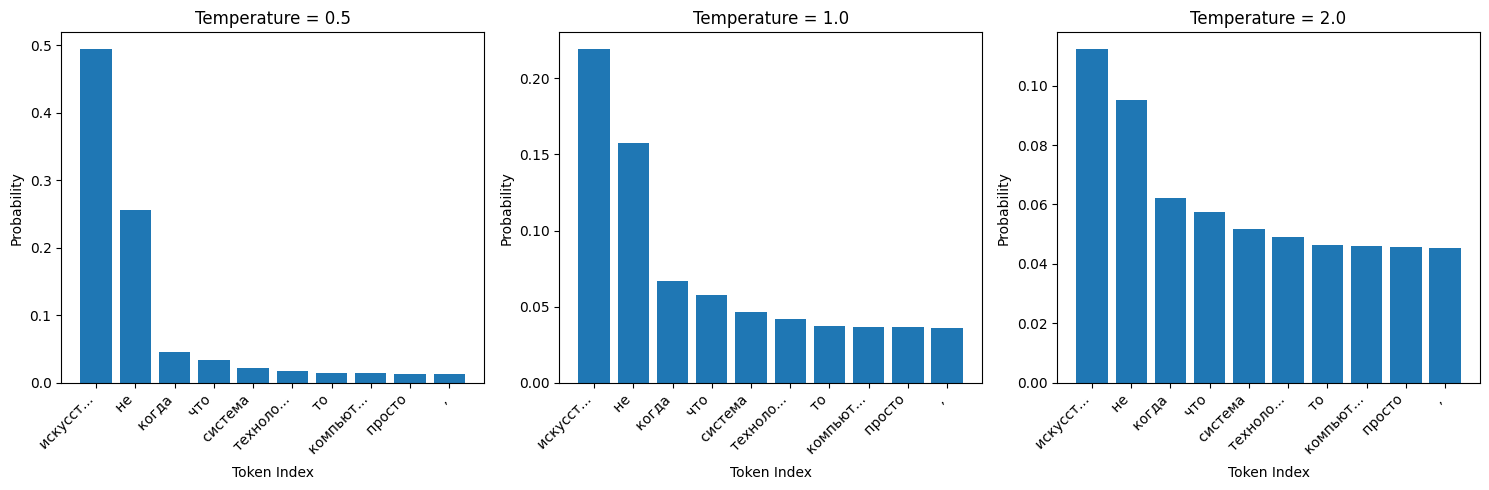

–ü—Ä–∏–º–µ—Ä 2: –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç, –∫–æ—Ç–æ—Ä—ã–π –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –º–æ–≥—É—Ç –±—ã—Ç—å —Ä–µ—à–µ–Ω—ã —á–µ–ª–æ–≤–µ–∫–æ–º.
–ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç, –∫–æ—Ç–æ—Ä—ã–π



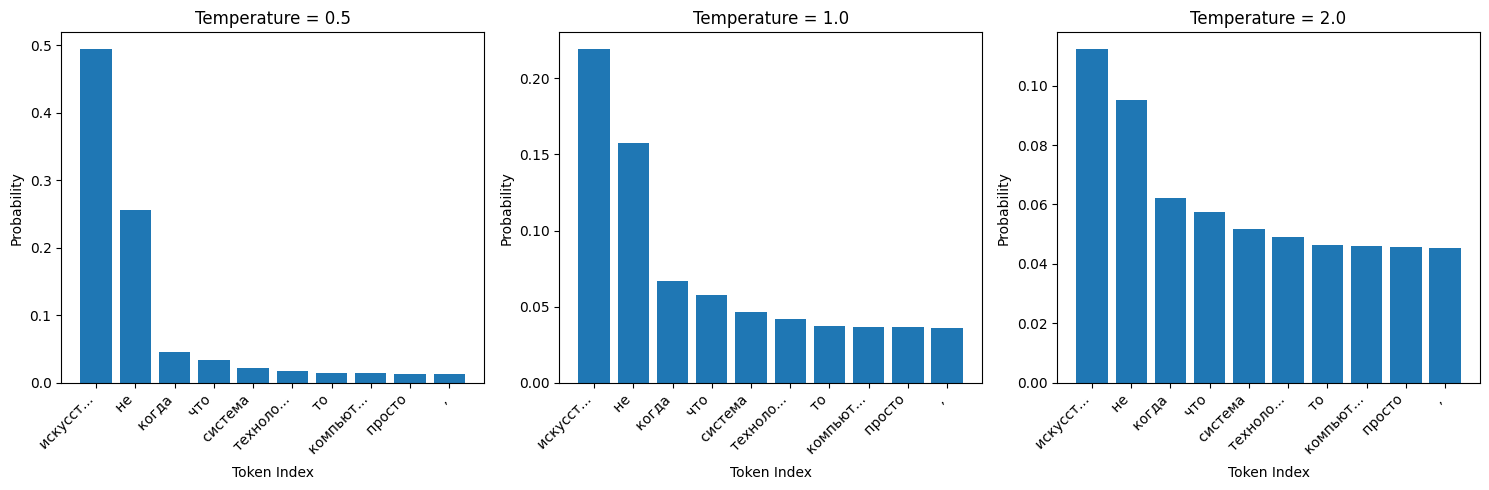


 –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ = 0.5
----------------------------------------
–ü—Ä–∏–º–µ—Ä 1: –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ –∫–æ–≥–¥–∞ –≤—Å–µ, —á—Ç–æ –Ω—É–∂–Ω–æ, –¥–µ–ª–∞–µ—Ç —á–µ–ª–æ–≤–µ–∫, –∞ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ –∫–æ–≥–¥–∞ –≤—Å–µ, —á—Ç–æ –Ω—É–∂–Ω–æ, –¥–µ–ª–∞–µ—Ç –º–∞—à–∏–Ω–∞.
–ï—Å–ª–∏ –±—ã –≤—ã –º–æ–≥–ª–∏ –≤—ã–±–∏—Ä–∞—Ç—å



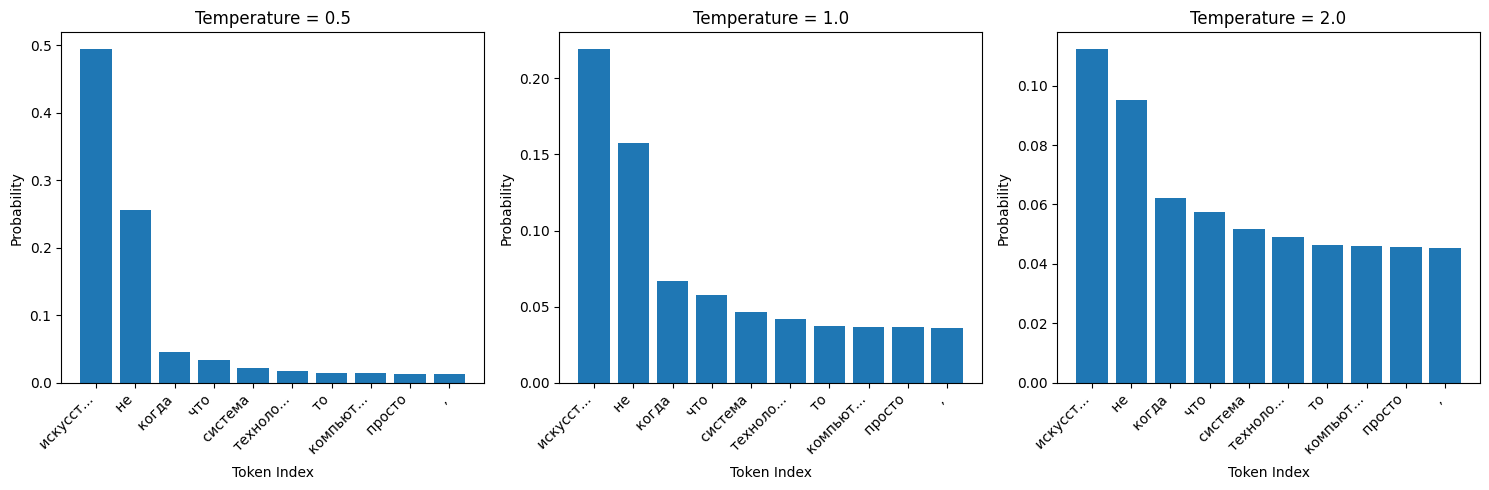

–ü—Ä–∏–º–µ—Ä 2: –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ –Ω–µ –ø—Ä–æ—Å—Ç–æ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç, —ç—Ç–æ - –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π —Ä–∞–∑—É–º. –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ –Ω–µ –ø—Ä–æ—Å—Ç–æ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç, —ç—Ç–æ - –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π —Ä–∞–∑—É–º. –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ



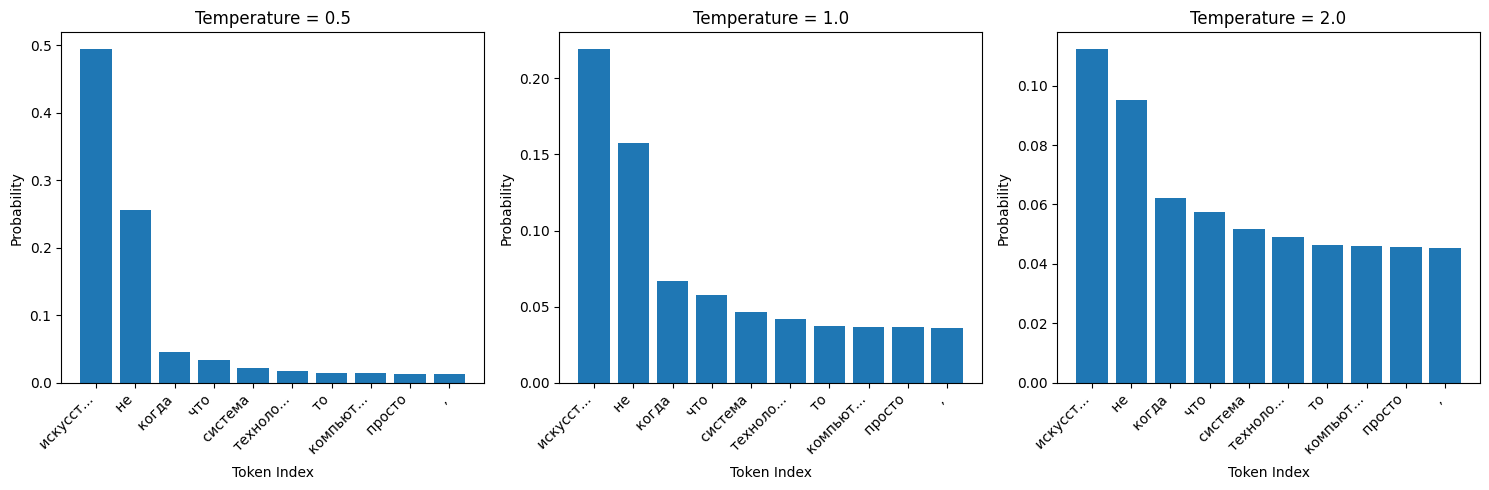


 –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ = 1.0
----------------------------------------
–ü—Ä–∏–º–µ—Ä 1: –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–∞—à–∏–Ω—ã –¥–µ–ª–∞—Ç—å –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ–µ –∏ –¥–µ–ª–∞—Ç—å —ç—Ç–æ –±—ã—Å—Ç—Ä–µ–µ.
–ü–æ–∂–∞–ª—É–π—Å—Ç–∞ –ø–æ–º–æ–≥–∏—Ç–µ... –∫—Ç–æ —Ä–µ–∞–ª—å–Ω–æ –º–æ–∂–µ—Ç, –æ—á–µ–Ω—å –Ω—É–∂–Ω–æ. –ü–æ–∂–∞–ª—É–π—Å—Ç–∞!
–ö–æ–ø–∏—Ç–µ –Ω–∞



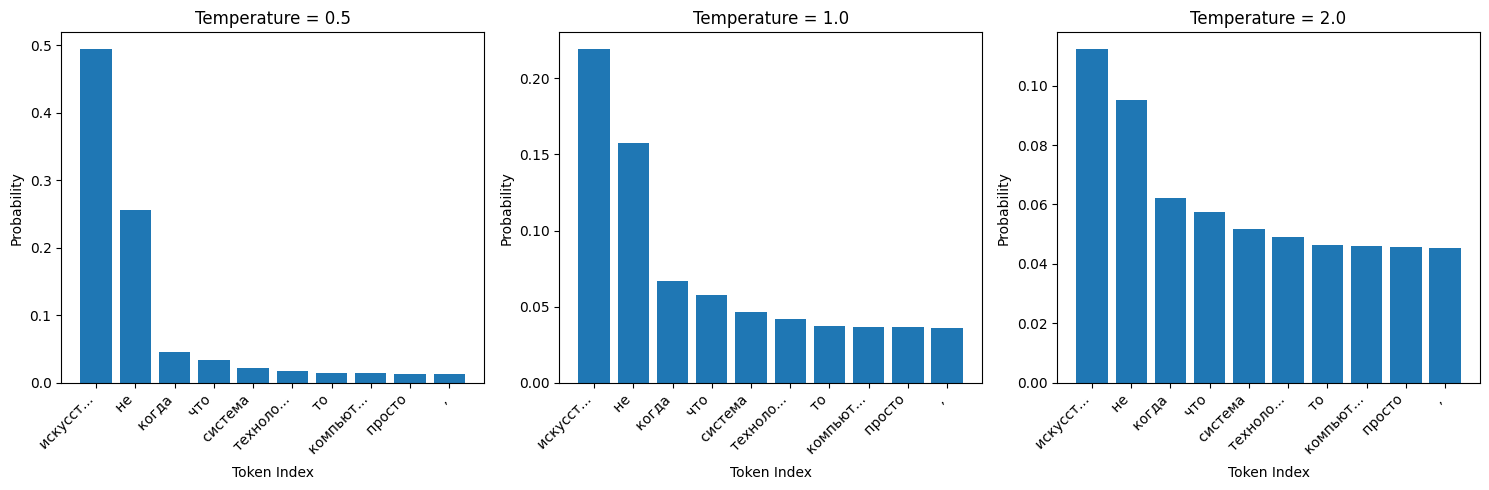

–ü—Ä–∏–º–µ—Ä 2: –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ –Ω–æ–≤–∞—è —Å–∏—Å—Ç–µ–º–∞, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–∑–≤–æ–ª–∏—Ç —á–µ–ª–æ–≤–µ–∫—É, –Ω–µ –∏–º–µ—è –Ω–∞ —ç—Ç–æ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤, —Å—Ç–∞—Ç—å —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω—ã–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–º —Å–≤–æ–µ–π –∂–∏–∑–Ω–∏.
–ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å, –∫–æ—Ç–æ—Ä—ã–π —Å—á–∏—Ç–∞–µ—Ç —Å–µ–±—è



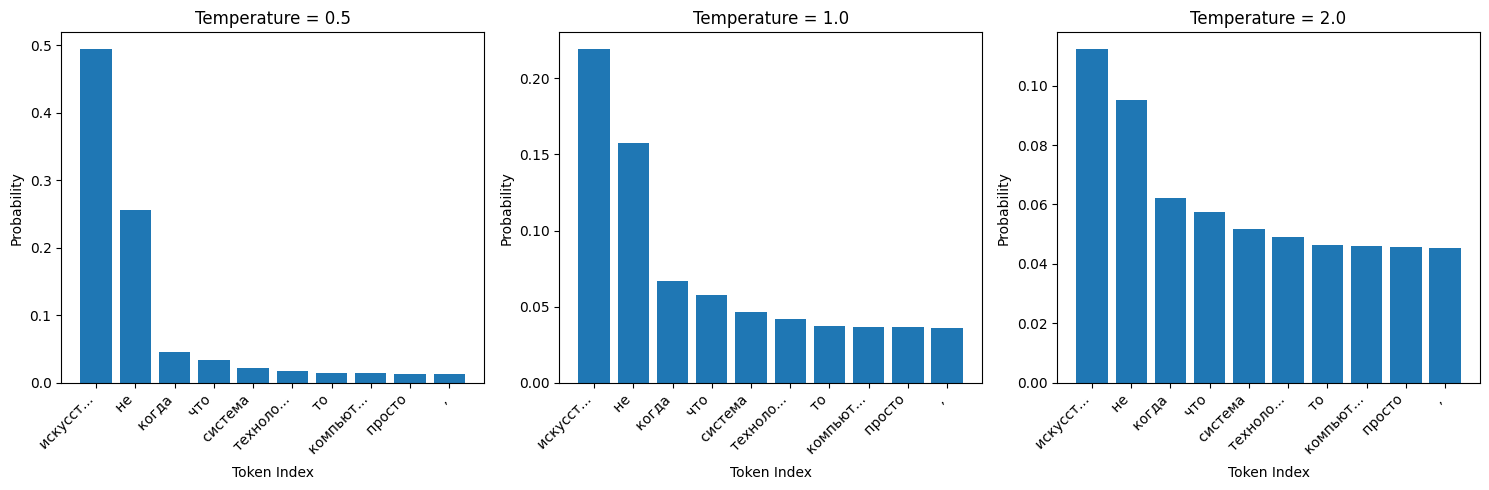


 –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ = 1.5
----------------------------------------
–ü—Ä–∏–º–µ—Ä 1: –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ –ø—Ä–æ—Ü–µ—Å—Å, –∞ –Ω–µ –ø—Ä–∏–±–æ—Ä. –ò–Ω—Ç–µ–ª–ª–µ–∫—Ç–æ–º –æ–±–ª–∞–¥–∞–µ—Ç —á–µ–ª–æ–≤–µ–∫, –ø–æ—Ç–æ–º—É —á—Ç–æ –ø—Ä–∏—Ä–æ–¥–∞ –Ω–∞ —ç—Ç–æ –Ω–µ –¥–∞–µ—Ç –æ—Ç–≤–µ—Ç–∞ (—Ö–æ—Ç—è –±—ã –∏–∑ —Å–æ–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å–µ–∫—Ä–µ—Ç–Ω–æ—Å—Ç–∏!). –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π



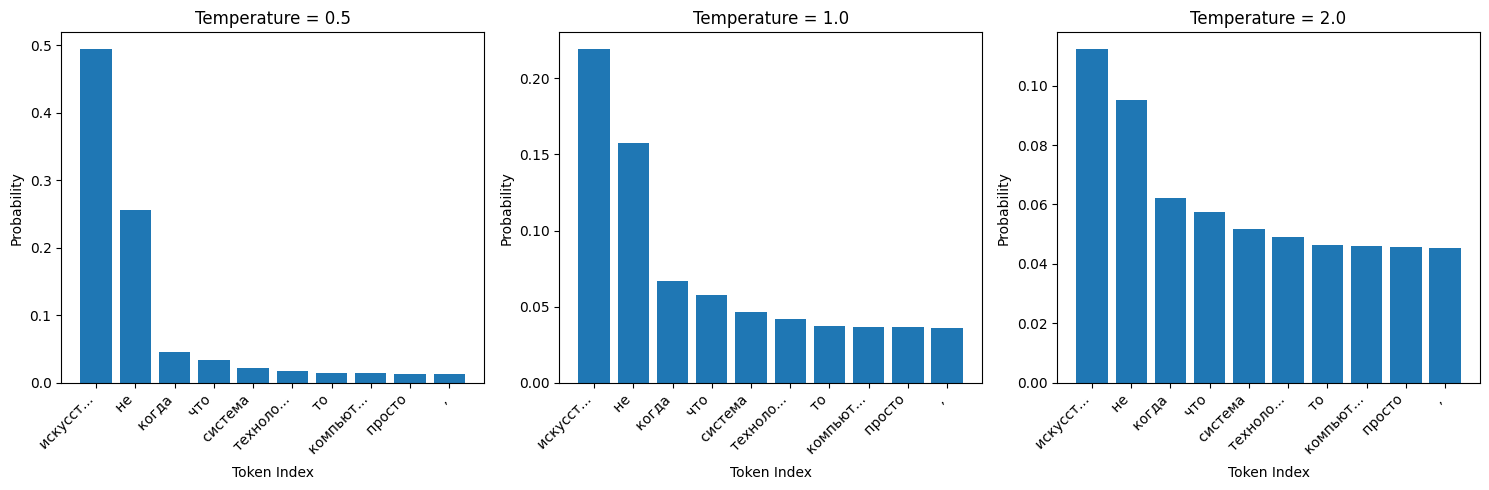

–ü—Ä–∏–º–µ—Ä 2: –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ —Å–∏—Å—Ç–µ–º–∞, –∫–æ—Ç–æ—Ä–∞—è, –±—É–¥—É—á–∏ –≤—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –≤ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–π –º–æ–∑–≥, –ø–æ–º–æ–≥–∞–µ—Ç –Ω–∞–º –≤—ã–ø–æ–ª–Ω—è—Ç—å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏, –Ω–æ –Ω–µ –∏–º–µ–µ—Ç –Ω–∏–∫–∞–∫–∏—Ö —Ü–µ–ª–µ–π. –° —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–º –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç–æ–º



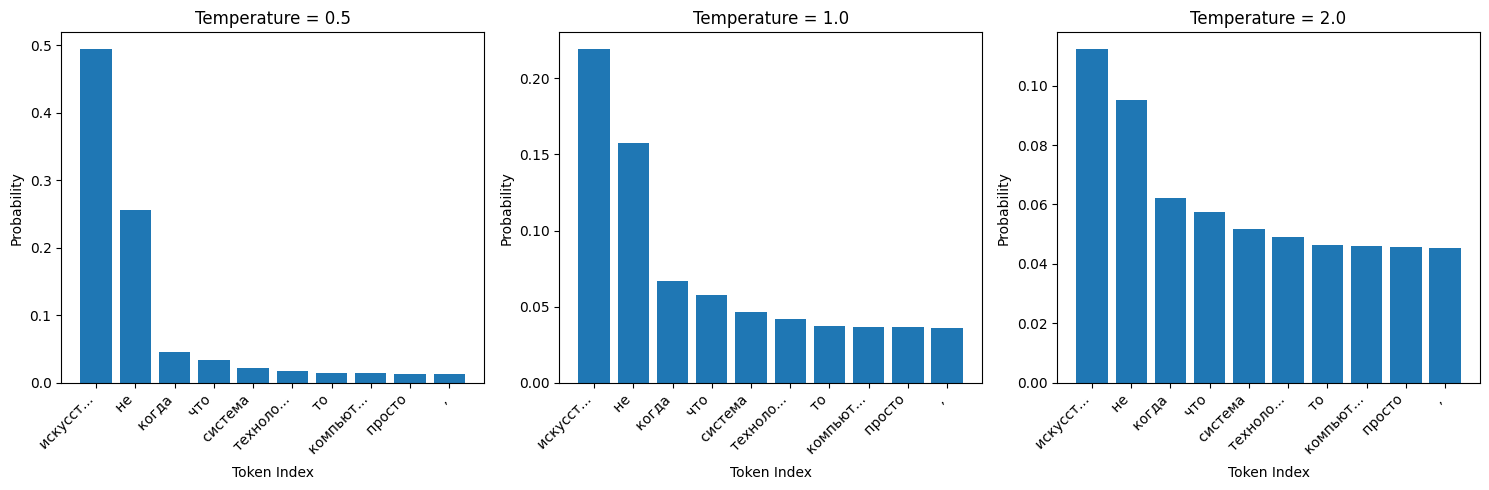


 –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ = 2.0
----------------------------------------
–ü—Ä–∏–º–µ—Ä 1: –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—è —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Ä–æ–±–æ—Ç–∞–º–∏-–∞–≤—Ç–æ–ª—é–±–∏—Ç–µ–ª—è–º–∏. –°—É—Ç—å —Ç–∞–∫–æ–≥–æ —Ä–∞–∑–≤–∏—Ç–∏—è —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è (—Ä–æ–±–æ—Ç–æ—Ç–∏–ø–æ–≤?) —Å–ª–µ–¥—É—é—â–∞—è. –†–æ–±–æ—Ç—ã –Ω–∞—É—á–∏–ª–∏—Å—å —Ä–∞–±–æ—Ç–∞—Ç—å –∞–≤—Ç–æ–Ω–æ–º–Ω—ã–º–∏ —Å–µ—Ä–≤–æ



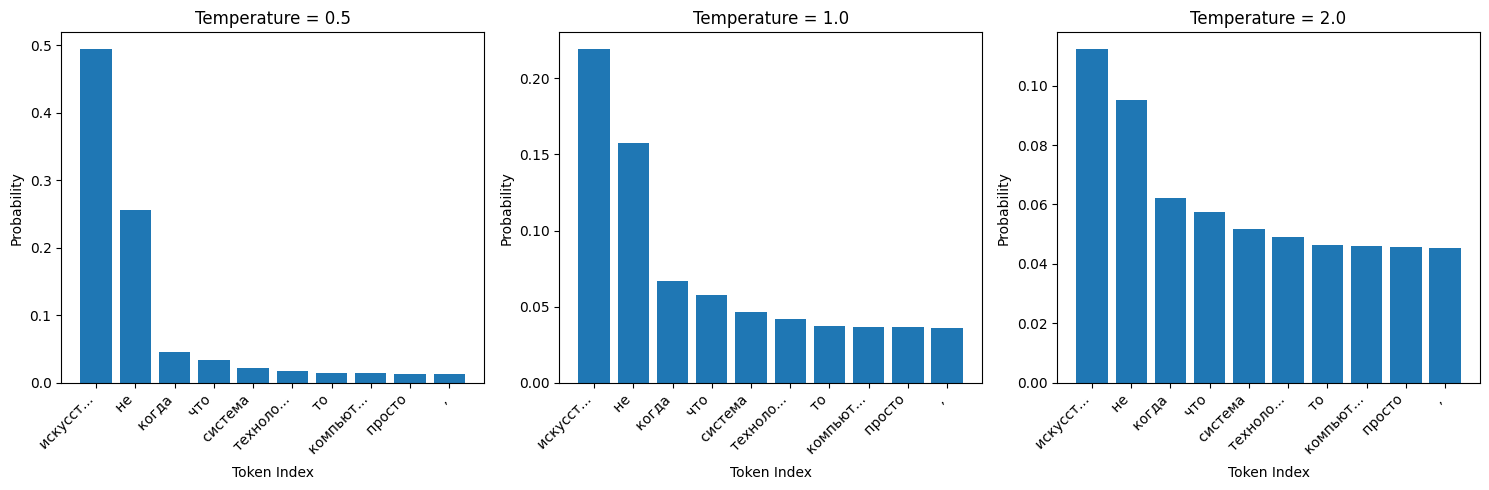

–ü—Ä–∏–º–µ—Ä 2: –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ —Ç–∞–∫–æ–π —á–µ–ª–æ–≤–µ–∫, –æ–Ω, –±–µ–∑—É—Å–ª–æ–≤–Ω–æ, –ª—É—á—à–µ –ª—é–±–æ–≥–æ –∂–∏–≤–æ–≥–æ - –µ–≥–æ –∂–∏–∑–Ω—å –Ω–∞–ø–æ–ª–Ω–µ–Ω–∞ –Ω–∞—Å—Ç–æ—è—â–∏–º —É–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ–º, –ø–æ—Ç–æ–º—É —á—Ç–æ —ç—Ç–æ —Ç–∞–∫–∞—è —Å–ª–æ–∂–Ω–∞—è –∂–∏–∑–Ω—å.
–ö–∞–∫–∏–º–∏ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞



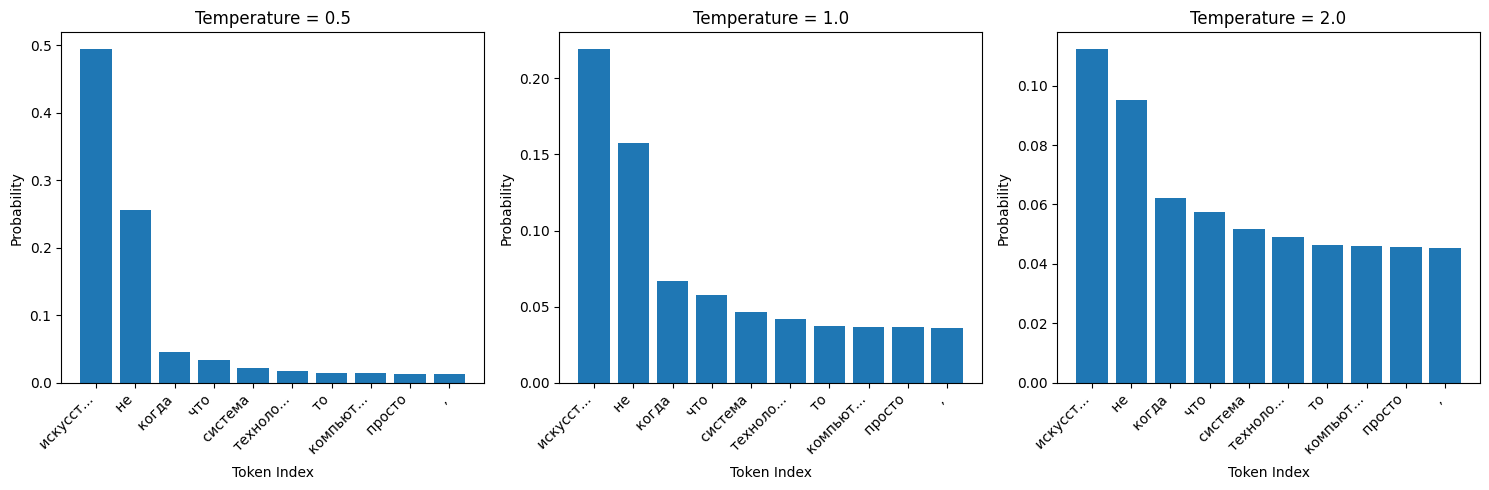

In [ ]:
model_name = "ai-forever/rugpt3large_based_on_gpt2"

tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

if tokenizer.pad_token is None:
      tokenizer.pad_token = tokenizer.eos_token

sampler = TemperatureSampler(model, tokenizer)

prompt = "–ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç - —ç—Ç–æ"

print(f"\n–ü—Ä–æ–º–ø—Ç: '{prompt}'\n")
print("=" * 80)

temperatures = [0.1, 0.5, 1.0, 1.5, 2.0]

for t in temperatures:
  print(f"\n –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ = {t}")
  print("-" * 40)

  results = sampler.generate(
    prompt=prompt,
    max_length=30,
    temperature=t,
    top_k=50,
    top_p=0.9,
    num_return_sequences=2
  )

  for i, text in enumerate(results, 1):
    print(f"–ü—Ä–∏–º–µ—Ä {i}: {text}")

    print("\n" + "=" * 80)
    sampler.visualize_temperature_effect(prompt, [0.5, 1.0, 2.0])

### Beam Search

–ò–Ω–æ–≥–¥–∞ –Ω–∞–º –Ω–µ –Ω—É–∂–Ω–æ, —á—Ç–æ–±—ã –º–æ–¥–µ–ª—å –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–ª–∞ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, —Ç–∞–∫ –∫–∞–∫ –º—ã —Ö–æ—Ç–∏–º –ø–æ–ª—É—á–∏—Ç—å –æ–¥–∏–Ω –ª—É—á—à–∏–π –≤–∞—Ä–∏–∞–Ω—Ç —Å —É—á–µ—Ç–æ–º –ø—Ä–µ—Ñ–∏–∫—Å–∞.

–ß—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –Ω–∞–∏–±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—É—é –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å, —Å–æ–¥–µ—Ä–∂–∞—â—É—é 10 —Ç–æ–∫–µ–Ω–æ–≤,  –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≤—Å–µ $|V|^{10}$ –≤–æ–∑–º–æ–∂–Ω—ã—Ö –≥–∏–ø–æ—Ç–µ–∑. –û–¥–Ω–∞–∫–æ –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω—ã–π –Ω–∞–∏–±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å –ø–æ–º–æ—â—å—é **beam search**.

–ö–∞–∫ —ç—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç:
0. –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º `beam` = [prefix], max beam_size = k
1. for T steps:
2. ` ... ` –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ —Ç–æ–∫–µ–Ω—ã –¥–ª—è –≤—Å–µ—Ö –≥–∏–ø–æ—Ç–µ–∑ –≤ beam, `len(beam) * len(vocab)` –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–≤
3. ` ... ` –≤—ã–±–∏—Ä–∞–µ–º `beam_size` –ª—É—á—à–∏—Ö –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–≤ –∫–∞–∫ –Ω–æ–≤—ã–π `beam`
4. –í—ã–±–∏—Ä–∞–µ–º –ª—É—á—à—É—é –≥–∏–ø–æ—Ç–µ–∑—É –∏–∑ beam

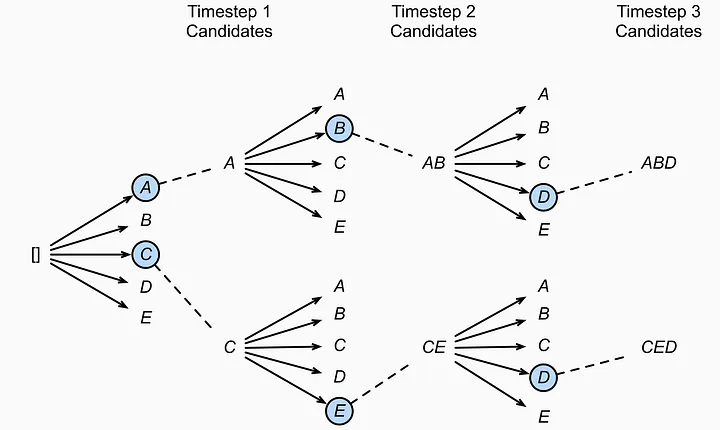

### –°–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ Min-p —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

[Turning Up the Heat: Min-p Sampling for Creative and Coherent LLM Outputs](https://arxiv.org/abs/2407.01082)

1. –í—ã–±–∏—Ä–∞–µ—Ç—Å—è —Ç–æ–∫–µ–Ω —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é ‚Äî $P_{max}$;

2. –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –º–µ—Ç–æ–¥–∞ ‚Äî –±–∞–∑–æ–≤—ã–π –ø–æ—Ä–æ–≥ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏, $P_{base}$ (–∞–≤—Ç–æ—Ä—ã —Ä–µ–∫–æ–º–µ–Ω–¥—É—é—Ç –≤—ã–±–∏—Ä–∞—Ç—å –º–µ–∂–¥—É 0,05 –∏ 0,1) ‚Äî —É–º–Ω–æ–∂–∞–µ—Ç—Å—è –Ω–∞ $P_{max}$, –∏ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –ø–æ—Ä–æ–≥ –æ—Ç—Å–µ—á–∫–∏ ‚Äî $P_{scaled}$. –ü–æ –Ω–µ–º—É –æ—Ç—Å–µ–∫–∞—é—Ç—Å—è —Ç–æ–∫–µ–Ω—ã, –≤—Å—ë, —á—Ç–æ –Ω–∏–∂–µ, –≤—ã–∫–∏–¥—ã–≤–∞–µ—Ç—Å—è;

3. –§–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è –ø—É–ª –¥–ª—è —Å–µ–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏–∑ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è —Ç–æ–∫–µ–Ω–æ–≤;

4. –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –Ω–æ—Ä–º–∞–ª–∏–∑—É—é—Ç—Å—è.

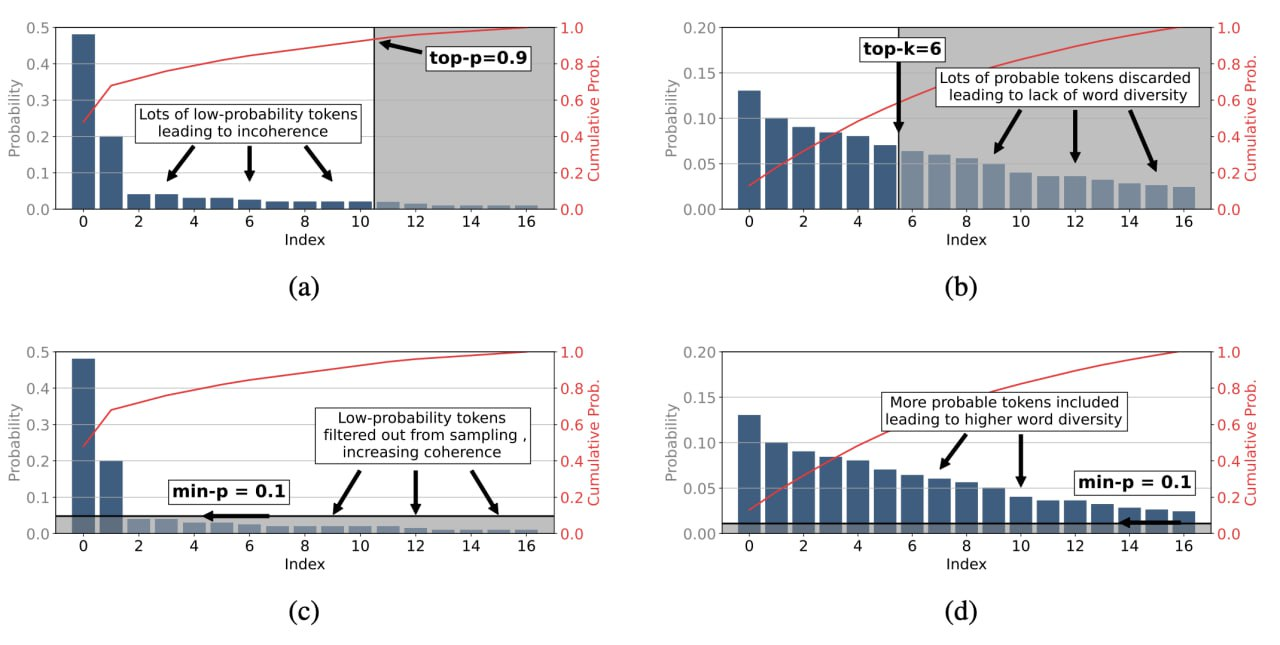

### –ù–µ–∫–æ—Ç–æ—Ä—ã–µ —Ç–æ–Ω–∫–æ—Å—Ç–∏ –ø—Ä–∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–µ —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏—è

- –î–ª—è –∫—Ä–µ–∞—Ç–∏–≤–Ω—ã—Ö –∑–∞–¥–∞—á –∏–º–µ–µ—Ç —Å–º—ã—Å–ª –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã (1.5-2.0) –≤ —Å–æ—á–µ—Ç–∞–Ω–∏–∏ —Å nucleus sampling (p=0.9-0.95) –∏–ª–∏ min-p sampling (0.05-0.1).

- –î–ª—è —Ñ–∞–∫—Ç–æ-–æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∑–∞–¥–∞—á –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω—ã –±–æ–ª–µ–µ –Ω–∏–∑–∫–∏–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã (0.1-0.7) —Å –±–æ–ª–µ–µ –∫–æ–Ω—Å–µ—Ä–≤–∞—Ç–∏–≤–Ω—ã–º–∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏ top-k –∏–ª–∏ top-p –¥–ª—è –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è —Ç–æ—á–Ω–æ—Å—Ç–∏.

- –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–∞—è –ø–ª–æ—Ç–Ω–æ—Å—Ç—å —Ç–µ–∫—Å—Ç–∞ —Ç–∞–∫–∂–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤—ã–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. –ü–ª–æ—Ç–Ω—ã–µ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–µ —Ç–µ–∫—Å—Ç—ã —Ç—Ä–µ–±—É—é—Ç –±–æ–ª–µ–µ —Å—Ç—Ä–æ–≥–æ–π —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ —Ç–æ–∫–µ–Ω–æ–≤, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ —Ä–∞–∑–≥–æ–≤–æ—Ä–Ω–∞—è —Ä–µ—á—å –º–æ–∂–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª–µ–µ —Å–≤–æ–±–æ–¥–Ω—ã–µ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –¥–ª—è –ø–æ–¥–¥–µ—Ä–∂–∞–Ω–∏—è –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç–∏.

- –î–ª—è –¥–ª–∏–Ω–Ω—ã—Ö —Ñ–æ—Ä–º –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ **Contrastive search** –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ø—Ä–µ–≤–æ—Å—Ö–æ–¥–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ –ø–æ–¥–¥–µ—Ä–∂–∞–Ω–∏–∏ –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏ –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –¥–ª–∏–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π.

**–ü–æ—Ä—è–¥–æ–∫ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤**

- –ü–æ—Ä—è–¥–æ–∫ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ç–µ—Ö–Ω–∏–∫ —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ. –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫: temperature ‚Üí top-k ‚Üí top-p ‚Üí repetition penalty. –ò–∑–º–µ–Ω–µ–Ω–∏–µ —ç—Ç–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ –º–æ–∂–µ—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –Ω–µ–æ–∂–∏–¥–∞–Ω–Ω—ã–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º.

- –û–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ top-k –∏ top-p –º–æ–∂–µ—Ç —Å–æ–∑–¥–∞–≤–∞—Ç—å –∫–æ–Ω—Ñ–ª–∏–∫—Ç—ã. –ï—Å–ª–∏ top-k –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –º–µ–Ω—å—à–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–æ–∫–µ–Ω–æ–≤, –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã—Ö top-p, —Ç–æ top-k —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏–º —Ñ–∞–∫—Ç–æ—Ä–æ–º, –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ —Å–≤–æ–¥—è –Ω–∞ –Ω–µ—Ç –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ nucleus sampling

- –ü—Ä–∏ –æ—á–µ–Ω—å –Ω–∏–∑–∫–æ–π —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ (< 0.5) nucleus sampling —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –º–µ–Ω–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º, –ø–æ—Å–∫–æ–ª—å–∫—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É–∂–µ —Å–∏–ª—å–Ω–æ —Å–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–æ –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ç–æ–∫–µ–Ω–∞—Ö. –í—ã—Å–æ–∫–∞—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ (> 1.5) –º–æ–∂–µ—Ç —Å–¥–µ–ª–∞—Ç—å top-p —á—Ä–µ–∑–º–µ—Ä–Ω–æ –∏–Ω–∫–ª—é–∑–∏–≤–Ω—ã–º


## Full finetuning

In [ ]:
import os
import torch
from transformers import (
    GPT2LMHeadModel,
    GPT2Tokenizer,
    Trainer,
    TrainingArguments,
    DataCollatorForLanguageModeling,
    set_seed
)
from datasets import load_dataset

In [ ]:
os.environ['WANDB_DISABLED'] = 'true'
os.environ['WANDB_MODE'] = 'disabled'

In [ ]:
set_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model_name = "ai-forever/rugpt3medium_based_on_gpt2"
output_dir = "rugpt3-poetry-finetuned"

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

dataset = load_dataset("AnyaSchen/russian_poetry_with_keywords")
dataset

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'author', 'keywords'],
        num_rows: 7755
    })
})

In [ ]:
dataset["train"][5]

{'text': '–ü—Ä–æ—á—ë–ª.\n–ü–æ—à—ë–ª.\n–ú–∏–Ω—É—Ç—ã —Å —Ç—Ä–∏ ‚Äì\n–æ–ø—è—Ç—å –∑–∞—Å—Ç—Ä—è–ª\n—É –¥–≤—É—Ö –≤–∏—Ç—Ä–∏–Ω.\n–ö–∞–∫–Ω–∏–∫–∞–∫,\n–∞ –∫ —à–∫–æ–ª—å–Ω—ã–º –∑–¥–∞–Ω—å—è–º\n–ø—Ä–∏—à—ë–ª\n—Å –æ–≥—Ä–æ–º–Ω—ã–º –æ–ø–æ–∑–¥–∞–Ω—å–µ–º.\n–î–≤–µ—Ä—å –Ω–∞ –∫–ª—é—á.\n–¢–æ–ª–∫–Ω—É–ª—Å—è –í–ª–∞—Å ‚Äì\n–Ω–µ –ø—É—Å–∫–∞—é—Ç –í–ª–∞—Å–∞\n–≤ –∫–ª–∞—Å—Å!\n',
 'author': '–ú–∞—è–∫–æ–≤—Å–∫–∏–π',
 'keywords': "['–∫–ª–∞—Å—Å', '–¥–≤–µ—Ä—å', '–ø—Ä–æ—á–µ—Å—Ç—å', '—Ç–æ–ª–∫–Ω—É—Ç—å—Å—è', '–∑–∞—Å—Ç—Ä—è—Ç—å']"}

In [ ]:
dataset.unique("author"), len(dataset['train'])

({'train': ['–ú–∞—è–∫–æ–≤—Å–∫–∏–π', '–¢—é—Ç—á–µ–≤', '–ë–ª–æ–∫', 'Ece–Ω–∏–Ω', '–ü—É—à–∫–∏–Ω']}, 7755)

In [ ]:
context_length = 128

outputs = tokenizer(
        dataset["train"][:2]['text'],
        truncation=True,
        max_length=context_length,
        return_overflowing_tokens=True,
        return_length=True,
)
outputs

{'overflowing_tokens': [[], []], 'num_truncated_tokens': [-66, -54], 'input_ids': [[677, 1145, 21984, 1864, 271, 2931, 510, 203, 353, 6094, 8339, 16, 203, 436, 2237, 4939, 811, 16, 203, 19051, 806, 13513, 28925, 18, 203, 6039, 282, 15959, 203, 42126, 18, 203, 443, 450, 717, 1004, 306, 1992, 16, 203, 44969, 34890, 392, 5, 203, 443, 2255, 3809, 505, 16, 203, 307, 4411, 203, 404, 3005, 203, 431, 2133, 7238, 18, 203], [1295, 23262, 30260, 309, 30770, 16, 203, 1212, 39753, 203, 2575, 288, 4920, 339, 203, 273, 1519, 16, 203, 275, 1808, 16, 203, 24333, 203, 5719, 485, 4272, 203, 32827, 331, 203, 1821, 414, 30760, 18, 203, 5798, 203, 280, 26212, 1073, 37832, 203, 413, 8293, 42306, 16, 9666, 460, 16, 203, 370, 1577, 203, 350, 1898, 975, 30, 203, 443, 21032, 5, 443, 203, 3001, 510, 203, 7774, 6833, 309, 9209, 18, 203]], 'length': [62, 74], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
dataset['train'][0]

{'text': '–í–ª–∞—Å –ü—Ä–æ–≥—É–ª–∫–∏–Ω ‚Äî\n–º–∏–ª—ã–π –º–∞–ª—å—á–∏–∫,\n—Å–ø–∞—Ç—å –ª–æ–∂–∏–ª—Å—è,\n–≤–∑—è–≤ –∂—É—Ä–Ω–∞–ª—å—á–∏–∫.\n–í—Å–µ –≤ –∂—É—Ä–Ω–∞–ª–µ\n–∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ.\n‚Äì –î–æ—á–∏—Ç–∞—é –≤–µ—Å—å,\n—Ö–æ—Ç—å —Ç—Ä–µ—Å–Ω—É!\n‚Äì –ù–∏ –æ—Ç–µ—Ü –µ–≥–æ,\n–Ω–∏ –º–∞—Ç—å\n–Ω–µ –º–æ–≥–ª–∏\n–∑–∞—Å—Ç–∞–≤–∏—Ç—å —Å–ø–∞—Ç—å.\n',
 'author': '–ú–∞—è–∫–æ–≤—Å–∫–∏–π',
 'keywords': "['—Å–ø–∞—Ç—å', '–∂—É—Ä–Ω–∞–ª—å—á–∏–∫', '–∑–∞—Å—Ç–∞–≤–∏—Ç—å', '–º–∞–ª—å—á–∏–∫', '–º–∞—Ç—å']"}

In [ ]:
def tokenize(example):
    outputs = tokenizer(
        example['text'],
        truncation=True,
        max_length=context_length,
        return_overflowing_tokens=True,
        return_length=True,
    )

    input_batch = []
    for length, input_ids in zip(outputs["length"], outputs["input_ids"]):
        if length == context_length:
            input_batch.append(input_ids)
    return {"input_ids": input_batch}


tokenized_data = dataset.map(
    tokenize, batched=True, remove_columns=dataset["train"].column_names
)
tokenized_data

Map:   0%|          | 0/7755 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids'],
        num_rows: 1369
    })
})

In [ ]:
model = GPT2LMHeadModel.from_pretrained(model_name)
model.config.n_ctx = context_length
model_size = sum(t.numel() for t in model.parameters())
model_size

config.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

355871744

In [ ]:
data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)

In [ ]:
out = data_collator([tokenized_data["train"][i] for i in range(5)])
for key in out:
    print(f"{key} shape: {out[key].shape}")

input_ids shape: torch.Size([5, 128])
attention_mask shape: torch.Size([5, 128])
labels shape: torch.Size([5, 128])


In [ ]:
def generation(model, tokenizer):
    model.eval()
    model = model.to(device)

    prompts = [
        "–í–µ—Å–Ω–∞, –≤–µ—Å–Ω–∞!",
        "–ê–≤–≥—É—Å—Ç–æ–≤—Å–∫–∏–π –≤–µ—á–µ—Ä",
        "–ú–æ—Ä–µ, –≤–æ–ª–Ω—ã –∏ "
    ]

    print("\n" + "="*50)

    for prompt in prompts:
        inputs = tokenizer.encode(prompt, return_tensors='pt').to(device)

        with torch.no_grad():
            outputs = model.generate(
                inputs,
                max_length=256,
                num_return_sequences=1,
                temperature=0.8,
                do_sample=True,
                top_p=0.9,
                top_k=50,
                repetition_penalty=1.2,
                pad_token_id=tokenizer.pad_token_id,
                eos_token_id=tokenizer.eos_token_id
            )

        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

        print(generated_text)
        print("="*50)

In [ ]:
generation(model, tokenizer)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



–í–µ—Å–Ω–∞, –≤–µ—Å–Ω–∞! –ü–æ—Ä–∞ –ª—é–±–≤–∏ –∏ —Å—á–∞—Å—Ç—å—è!"  

–ö—Ä—É–≥–æ–º —Ü–≤–µ—Ç—ã - —Ç—é–ª—å–ø–∞–Ω—ã, –Ω–∞—Ä—Ü–∏—Å—Å—ã... –ù–æ –ø–æ—á–µ–º—É-—Ç–æ –≤ —Å–µ—Ä–¥—Ü–µ —Ç–æ—Å–∫–∞. –û—Ç —Ç–æ—Å–∫–∏ —Ö–æ—á–µ—Ç—Å—è –ø–µ—Ç—å, –Ω–æ –Ω–∏–∫—Ç–æ –Ω–µ —É—Å–ª—ã—à–∏—Ç –º–µ–Ω—è‚Ä¶ –Ø –±—ã —Ö–æ—Ç–µ–ª–∞ —É—Å–ª—ã—à–∞—Ç—å –≥–æ–ª–æ—Å –ª—é–±–∏–º–æ–π –ø–µ—Å–Ω–∏ –ø–æ–¥ –∞–∫–∫–æ–º–ø–∞–Ω–µ–º–µ–Ω—Ç —ç—Ç–æ–≥–æ –ø—Ä–µ–∫—Ä–∞—Å–Ω–æ–≥–æ –æ—Ä–≥–∞–Ω–∞, –∫–æ—Ç–æ—Ä—ã–π –∑–≤—É—á–∏—Ç –ø–æ –≤—Å–µ–π –†–æ—Å—Å–∏–∏ –∫–∞–∂–¥—ã–π –¥–µ–Ω—å —Å —É—Ç—Ä–∞ –¥–æ –≤–µ—á–µ—Ä–∞: ¬´–° –¥–Ω–µ–º —Ä–æ–∂–¥–µ–Ω—å—è —Ç–µ–±—è –ø–æ–∑–¥—Ä–∞–≤–ª—è–µ–º!¬ª –ò –ø—É—Å—Ç—å —É –Ω–∞—Å –≤—Å–µ –±—É–¥–µ—Ç —Ö–æ—Ä–æ—à–æ! –ú—ã –≤–µ–¥—å –ª—é–±–∏–º –¥—Ä—É–≥ –¥—Ä—É–≥–∞!!! –í –î–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è –º–æ–µ–π —Å–µ–º—å–∏ –º—ã –∂–µ–ª–∞–µ–º –í–∞–º –≤—Å–µ–≥–æ —Å–∞–º–æ–≥–æ –Ω–∞–∏–ª—É—á—à–µ–≥–æ!!!!!! –ë—É–¥—å—Ç–µ —Å—á–∞—Å—Ç–ª–∏–≤—ã –≤–º–µ—Å—Ç–µ!!!
–ò –∫–æ–Ω–µ—á–Ω–æ –∂–µ: –ó–¥–æ—Ä–æ–≤—å—è, –õ—é–±–≤–∏ –∏ –î–æ–ª–≥–æ–ª–µ—Ç–∏—è –≤–∞–º –≤—Å–µ–º!!!!!!!!
–ü—É—Å—Ç—å —Å–±—É–¥

In [ ]:
args = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=4,
    warmup_steps=50,
    save_strategy="steps",
    save_steps=500,
    num_train_epochs=2,
    weight_decay=0.1,
    lr_scheduler_type="cosine",
    optim="adamw_torch",
    learning_rate=5e-4,
    fp16=torch.cuda.is_available(),
)

trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
    args=args,
    data_collator=data_collator,
    train_dataset=tokenized_data["train"],
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-3103839852.py:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


TrainOutput(global_step=344, training_loss=2.9789056112599925, metrics={'train_runtime': 225.6044, 'train_samples_per_second': 12.136, 'train_steps_per_second': 1.525, 'total_flos': 635695625404416.0, 'train_loss': 2.9789056112599925, 'epoch': 2.0})

In [ ]:
generation(model, tokenizer)


–í–µ—Å–Ω–∞, –≤–µ—Å–Ω–∞!
–ö—Ä—É–∂–∏–º—Å—è –≤ —Ç—É–º–∞–Ω–µ, —Å–≤–∏—Å—Ç—è –Ω–∞ –º–µ—Ç–µ–ª–∏.
–ù–∞ —É–ª–∏—Ü–µ —Å–Ω–µ–∂–Ω–æ–π ‚Äì –≤–µ—á–µ—Ä–Ω–∏–π —Å–≤–µ—Ç.
–°–∫—É–∫–∞–µ—à—å –ª–∏ —Ç—ã –ø–æ–¥ –æ–∫–Ω–æ–º —Å–≤–æ–∏–º?
–í—Å–ø–ª–µ—Å–∫ –ª–µ–¥—è–Ω—ã—Ö –±—Ä—ã–∑–≥ –∏ –∑–≤–æ–Ω–∫–æ –±—å–µ—Ç —Ç–≤–æ–π –ª–µ–¥.
–¢—ã –∏–¥–µ—à—å –ø–æ —É–ª–∏—Ü–∞–º —Å–∫–æ–ª—å–∑–∫–∏–º–∏ —à–∞–≥–∞–º–∏;
–ù–æ –∫–∞–∫ –∂–µ —Å—Ç—Ä–∞–Ω–Ω–æ: —è –≤–∏–∂—É —Ç–µ–±—è...
–ò –≤–æ—Ç, –ø—Ä–æ—Ö–æ–¥—è —Å —Ç–≤–æ–µ–π —É–ª—ã–±–∫–æ–π –Ω–µ–∂–Ω–æ–π,
–Ø —É–≤–∏–¥–µ–ª —Å–ª–µ–∑—ã —Ç–≤–æ–∏ –±–µ–∑ —Ä–µ—Å–Ω–∏—Ü...
–ß—Ç–æ –∂ —Ç–µ–ø–µ—Ä—å?!‚Äì –Ø –ø–æ–¥–æ—à–µ–ª –∫ –æ–∫–Ω—É —Ç–≤–æ–µ–º—É...
–õ—å–¥–∏–Ω–∞ –∑–∞ –ª—å–¥–∏–Ω–æ–π –∑–≤—è–∫–Ω—É–ª–∞ –æ –ª–µ–¥.
–ó–Ω–∞–∫–æ–º—ã–π –≥–æ–ª–æ—Å –º–µ–Ω—è –ø—Ä–µ—Ä–≤–∞–ª —Ç–≤–æ–µ –º–æ–ª—á–∞–Ω—å–µ:
¬´–ó–∞–≤—Ç—Ä–∞... –∑–∞–≤—Ç—Ä–∞... –Ø –∂–¥—É...¬ª
–ò –≤–¥—Ä—É–≥ –∏–∑ —Ç–≤–æ–∏—Ö –≥–ª–∞–∑ –º–æ–∏—Ö —Å—Ç—Ä—É–∏—Ç—Å—è —Å–ª–µ–∑–∏–Ω–∫–∞.
–ò —è, –≥–ª—è–¥—è –≤ —Å—É–º—Ä–∞–∫ –Ω–æ—á–Ω—ã—Ö —É–ª–∏—Ü —Ç—É–º–∞–Ω–Ω—ã—Ö,
–£–≤–∏–¥–µ–ª –≤–∞—Å –≤–¥–≤–æ–µ–º.